<a href="https://colab.research.google.com/github/KavyaMalhotra/2d-image-to-3d-model/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install numpy-stl
!python -m tkinter


Traceback (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/lib/python3.10/tkinter/__main__.py", line 7, in <module>
    main()
  File "/usr/lib/python3.10/tkinter/__init__.py", line 4596, in _test
    root = Tk()
  File "/usr/lib/python3.10/tkinter/__init__.py", line 2299, in __init__
    self.tk = _tkinter.create(screenName, baseName, className, interactive, wantobjects, useTk, sync, use)
_tkinter.TclError: no display name and no $DISPLAY environment variable


quick start!

In [ ]:
from stl import mesh
import math
import numpy
import plotly.graph_objects as go

# Define the 8 vertices of the cube
vertices = [
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
]

# Define the 12 triangles composing the cube
faces = [
    [0, 1, 2], [1, 2, 3], # front
    [4, 5, 6], [5, 6, 7], # back
    [0, 1, 4], [1, 4, 5], # bottom
    [2, 3, 6], [3, 6, 7], # top
    [0, 2, 4], [2, 4, 6], # left
    [1, 3, 5], [3, 5, 7]  # right
]

# Create a list of x, y and z coordinates for each vertex
x, y, z = zip(*vertices)

# Create a list of i, j and k indices for each face
i, j, k = zip(*faces)

# Create a 3D figure
fig = go.Figure(data=[
    go.Mesh3d(
        x=x,
        y=y,
        z=z,
        i=i,
        j=j,
        k=k,
        color='lightblue',
        opacity=0.50
    )
])

# Show the plot
fig.show()



Simple example on how to create a cube using triangles for faces

In [ ]:
import numpy as np
from stl import mesh

# Define the 8 vertices of the cube
vertices = np.array([\
    [-1, -1, -1],
    [+1, -1, -1],
    [+1, +1, -1],
    [-1, +1, -1],
    [-1, -1, +1],
    [+1, -1, +1],
    [+1, +1, +1],
    [-1, +1, +1]])
# Define the 12 triangles composing the cube
faces = np.array([\
    [0,3,1],
    [1,3,2],
    [0,4,7],
    [0,7,3],
    [4,5,6],
    [4,6,7],
    [5,1,2],
    [5,2,6],
    [2,3,6],
    [3,7,6],
    [0,1,5],
    [0,5,4]])

# Create the mesh
cube = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        cube.vectors[i][j] = vertices[f[j],:]

# Write the mesh to file "cube.stl"
cube.save('cube.stl')

Read Image from file

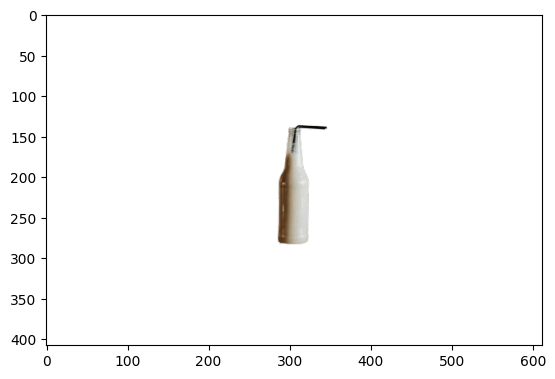

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
im = Image.open("/content/table2.png")
plt.imshow(im)

Convert the image to grey scale

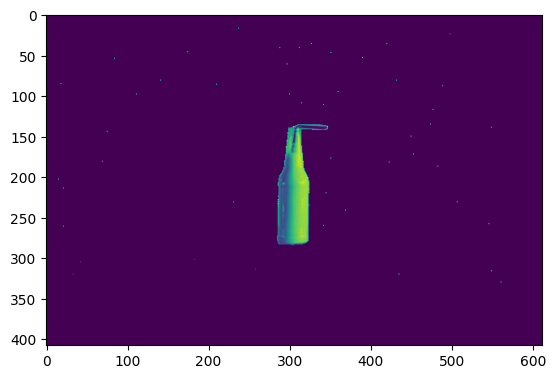

In [ ]:
grey_img = Image.open("/content/table2.png").convert('L')
plt.imshow(grey_img)
# img.save('greyscale.png')

Create simple surface using 2 triangles

In [ ]:
import numpy as np
from stl import mesh

# Define the 8 vertices of the cube
vertices = np.array([\
    [-1, -1, -1],
    [+1, -1, -1],
    [+1, +1, -1],
    [-1, +1, -1]])
# Define the 12 triangles composing the cube
faces = np.array([\
    [1,2,3],
    [3,1,0]])

# Create the mesh
cube = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        cube.vectors[i][j] = vertices[f[j],:]

# Write the mesh to file "cube.stl"
cube.save('surface.stl')

Create a surface 1000 x 1000 with n triangles

In [ ]:
grey_img = Image.open("/content/table2.png").convert('L')

max_size = (1000,1000)


max_height = 100
min_height = 0


grey_img.thumbnail(max_size)
# print(grey_img.mode)
imageNp = np.array(grey_img)
maxPix = imageNp.max()
minPix = imageNp.min()


# print(f"shape:{imageNp.shape}")
print(imageNp)
(ncols, nrows) = grey_img.size

# nrows = 10
# ncols = 50
vertices = np.zeros((nrows, ncols, 3))

for x in range(0, ncols):
  for y in range(0, nrows):
    pixelIntensity = imageNp[y][x]
    z = pixelIntensity * max_height / maxPix
    vertices[y][x] = (x, y, z)

# nfaces = (ncols * nrows)/2
faces = []

for x in range(0, ncols-1):
  for y in range(0, nrows-1):
    z = 0
    #face1
    vertice1 = vertices[y][x]
    vertice2 = vertices[y+1][x]
    vertice3 = vertices[y+1][x+1]
    face1 = np.array([vertice1, vertice2, vertice3])

    #face2
    vertice1 = vertices[y][x]
    vertice2 = vertices[y][x+1]
    vertice3 = vertices[y+1][x+1]
    face2 = np.array([vertice1, vertice2, vertice3])

    faces.append(face1)
    faces.append(face2)

facesNp = np.array(faces)

# Create the mesh
surface = mesh.Mesh(np.zeros(facesNp.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        surface.vectors[i][j] = facesNp[i][j]


surface.save('surface.stl')
print(surface)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
<Mesh: '' 497354 vertices>
